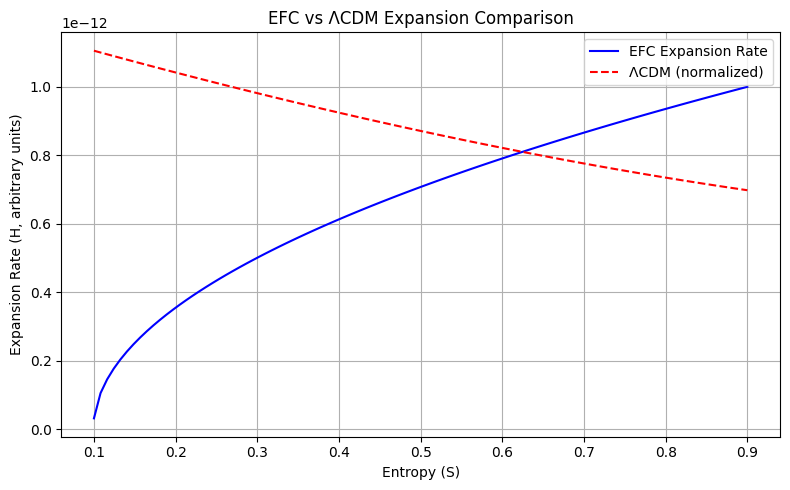

EFC mean H: 6.657e-13
ΛCDM mean H: 8.815e-13
Output saved to: /output/EFC_vs_LCDM_results.csv and /output/EFC_vs_LCDM_plot.png


In [1]:
# EFC_vs_LCDM.ipynb

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.efc_core import efc_potential, expansion_rate

# 1️⃣ Parameter space
rho = np.linspace(1e-27, 1e-24, 100)
S = np.linspace(0.1, 0.9, 100)

# 2️⃣ EFC model
Ef = efc_potential(rho, S)
H_efc = expansion_rate(Ef, S)

# 3️⃣ Simplified ΛCDM model
# Friedmann relation: H(z) = H0 * sqrt(Ω_m(1+z)^3 + Ω_Λ)
H0 = np.mean(H_efc)
Ω_m, Ω_Λ = 0.3, 0.7
z = 1 - S  # map entropy S inversely to redshift z
H_lcdm = H0 * np.sqrt(Ω_m * (1 + z)**3 + Ω_Λ)

# 4️⃣ Prepare comparison data
comparison = pd.DataFrame({
    "Entropy_S": S,
    "EFC_H": H_efc,
    "LCDM_H": H_lcdm
})

# 5️⃣ Save numeric results
comparison.to_csv("../output/EFC_vs_LCDM_results.csv", index=False)

# 6️⃣ Visualization
plt.figure(figsize=(8, 5))
plt.plot(S, H_efc, label="EFC Expansion Rate", color='blue')
plt.plot(S, H_lcdm, label="ΛCDM (normalized)", color='red', linestyle='--')
plt.xlabel("Entropy (S)")
plt.ylabel("Expansion Rate (H, arbitrary units)")
plt.title("EFC vs ΛCDM Expansion Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 7️⃣ Save plot
plt.savefig("../output/EFC_vs_LCDM_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# 8️⃣ Summary stats
print(f"EFC mean H: {np.mean(H_efc):.3e}")
print(f"ΛCDM mean H: {np.mean(H_lcdm):.3e}")
print("Output saved to: /output/EFC_vs_LCDM_results.csv and /output/EFC_vs_LCDM_plot.png")
